In [108]:
import nltk
nltk.download('gutenberg')
nltk.download('punkt_tab')
nltk.download('stopwords')
import re
from nltk.corpus import gutenberg, stopwords
from gensim.models import Doc2Vec, Word2Vec
from gensim.models.doc2vec import TaggedDocument

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Load dataset

In [12]:
corpus = list(gutenberg.sents('shakespeare-hamlet.txt'))

In [13]:
print('Type of corpus: ', type(corpus))
print('Length of corpus: ', len(corpus))

Type of corpus:  <class 'list'>
Length of corpus:  3106


In [26]:
for sentence in corpus[0:3]:
    print(sentence)

['the', 'tragedie', 'of', 'hamlet', 'by', 'william', 'shakespeare']
['actus', 'primus']
['scoena', 'prima']


# Preprocess the data
We do a very simple preprocessing here by:
- Removing the strings that are not a word
- Removing the stop words
- Keeping a lowercase version of the strings.

In [111]:
for i in range(len(corpus)):
    stop_words = set(stopwords.words('english'))
    corpus[i] = [word.lower() for word in corpus[i] if re.match('^[a-zA-Z]+', word) and word not in stop_words]

In [112]:
for sentence in corpus[0:3]:
    print(sentence)

['tragedie', 'hamlet', 'william', 'shakespeare']
['actus', 'primus']
['scoena', 'prima']


# Word2Vec
We use here [the Word2Vec](https://en.wikipedia.org/wiki/Word2vec) model [from the gensim api](https://radimrehurek.com/gensim/models/word2vec.html)

### Training the model
Create a word2vec model from the hamlet corpus\
The parameters we use here are:
- sentences: training data, our corpus
- vector_size: dimension of embedding space
- window: number of words accounted for each context (if the window size is 3, 3 word in the left neighorhood and 3 word in the right neighborhood are considered)
- min_count: minimum count of words to be included in the vocabulary
- workers: number of worker threads to train

In [135]:
word2vec_model = Word2Vec(sentences = corpus, vector_size = 5, window = 3, min_count = 1)
word2vec_model.save('models/word2vec_model')

### Visualizing the model

In [136]:
word2vec_model.wv['king']

array([ 0.0053342 ,  0.08334137,  0.12624338, -0.23989485, -0.19198023],
      dtype=float32)

In [137]:
word2vec_model.wv.most_similar("hamlet")

[('foh', 0.97120201587677),
 ('theme', 0.9696580171585083),
 ('gray', 0.9664727449417114),
 ('weedes', 0.96253502368927),
 ('faces', 0.9592371582984924),
 ('finger', 0.9572560787200928),
 ('great', 0.9553272128105164),
 ('shrowding', 0.9523821473121643),
 ('tenants', 0.9454537034034729),
 ('coniuring', 0.9443256855010986)]

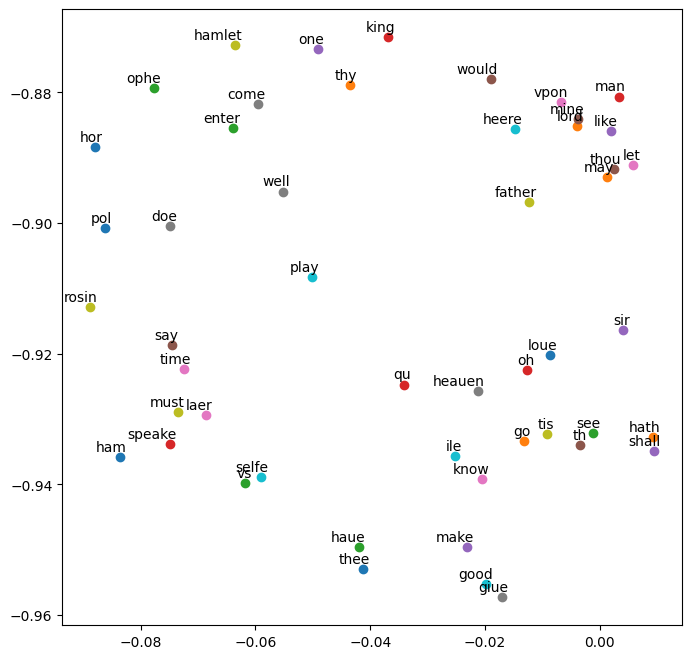

In [138]:
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

def visualize_embeddings(embeddings, words):
    tsne = TSNE(n_components=2, random_state=0, perplexity=len(words)-1)
    embedding_vectors = np.array([embeddings[word] for word in words])
    two_d_embeddings = tsne.fit_transform(embedding_vectors)

    plt.figure(figsize=(8, 8))
    for i, word in enumerate(words):
        x, y = two_d_embeddings[i, :]
        plt.scatter(x, y)
        plt.annotate(word, (x, y), xytext=(5, 2), textcoords="offset points", ha="right", va="bottom")
    plt.show()

word2vec_words = word2vec_model.wv.index_to_key
visualize_embeddings(word2vec_model.wv, word2vec_words[:50]) # We take a subset of the words for readability

# Doc2Vec
We use an extension of Word2Vec, called Doc2Vec [from the gensim api](https://radimrehurek.com/gensim/models/doc2vec.html#gensim.models.doc2vec.Doc2Vec)

### Training the model

In [139]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(corpus)]
doc2vec_model = Doc2Vec(documents, vector_size=100, window=2, min_count=1, workers=4)
doc2vec_model.save('models/doc2vec_model')

### Visualizing the model

In [140]:
doc2vec_model.wv["queen"]
doc2vec_model.wv.most_similar("hamlet")

[('haue', 0.9400129914283752),
 ('giue', 0.9324520230293274),
 ('thy', 0.9300535917282104),
 ('let', 0.9235312342643738),
 ('much', 0.9234124422073364),
 ('heauen', 0.9213981628417969),
 ('selfe', 0.9202454090118408),
 ('heere', 0.9200251698493958),
 ('make', 0.9198963642120361),
 ('loue', 0.9198593497276306)]

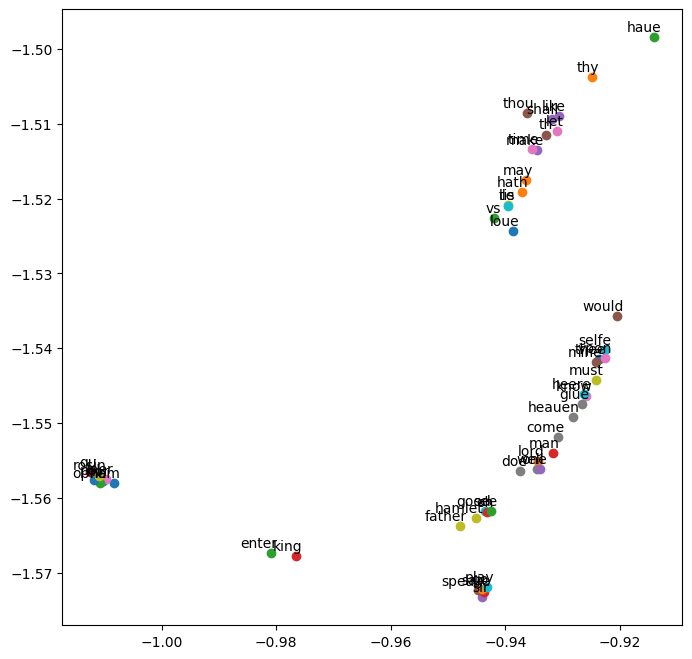

In [141]:
doc2vec_words = doc2vec_model.wv.index_to_key
visualize_embeddings(doc2vec_model.wv, doc2vec_words[:50])

# Implement your own

If you feel like it, you can try to implement your own way word embedding and compare it with the two above!